# GOLD, OIL, CRYPTO, NSE INDEX CORRELATION 

## by Oluwaseun Akinwunmi

In [1]:
import os
import numpy as np
import pandas as pd
import quandl
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Returns id, currentPrice, changePercentage, currentDateTime, IndiciesData[tickertime, price]
NSE_DATA_URL = 'http://www.nse.com.ng/REST/api/chartdata/ASI'

In [3]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries for the last 6months'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        # Add qopts = { 'columns': ['date', *args] } as a kwarg to get more data
        # collapse="monthly",
        df = quandl.get(quandl_id, returns="pandas", start_date='2018-01-01', end_date='2018-06-30')
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [4]:
def get_json_data(json_url, cache_path):
    '''Download and cache JSON data, return as a dataframe.'''
    try:        
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(json_url))
    except (OSError, IOError) as e:
        print('Downloading {}'.format(json_url))
        df = pd.read_json(json_url)
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(json_url, cache_path))
    return df

In [5]:
# Get bitcoin price data from quandl
btc_data = get_quandl_data('BCHARTS/COINBASEUSD')
btc_data.head()

Loaded BCHARTS/COINBASEUSD from cache


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2018-01-01,13863.14,13889.0,12952.50,13480.01,12058.273003,1.618661e+08,13423.654302
2018-01-02,13480.00,15275.0,13005.00,14781.51,26096.441001,3.698980e+08,14174.271174
2018-01-03,14781.52,15400.0,14628.00,15098.14,17616.327677,2.642264e+08,14998.951689
2018-01-04,15098.23,15400.0,14230.00,15144.99,19567.016783,2.909045e+08,14867.084719
2018-01-05,15145.00,17178.0,14819.78,16960.01,22588.046307,3.619888e+08,16025.681104


In [6]:
# Get only the `Open` Column
btc_data = btc_data[['Open']]
# Rename `Open` to `BTCPrice`
btc_data = btc_data.rename(index=str, columns={"Open": "BTCPrice"});
btc_data.index = pd.DatetimeIndex(btc_data.index)
print(btc_data.head())
btc_data.tail()

            BTCPrice
Date                
2018-01-01  13863.14
2018-01-02  13480.00
2018-01-03  14781.52
2018-01-04  15098.23
2018-01-05  15145.00


,BTCPrice
Date,
2018-06-25,6150.00
2018-06-26,6246.01
2018-06-27,6074.01
2018-06-28,6132.16
2018-06-29,5850.25


In [7]:
# Get crude oil data from quandl
crude_data = get_quandl_data('OPEC/ORB')
crude_data.head()

Loaded OPEC/ORB from cache


,Value
Date,
2018-01-02,64.84
2018-01-03,65.13
2018-01-04,66.13
2018-01-05,65.86
2018-01-08,65.85


In [8]:
# Rename `Value` to `CrudePrice`
crude_data = crude_data.rename(index=str, columns={"Value": "CrudePrice"});
crude_data.index = pd.DatetimeIndex(crude_data.index)
print(crude_data.head())
crude_data.tail()

            CrudePrice
Date                  
2018-01-02       64.84
2018-01-03       65.13
2018-01-04       66.13
2018-01-05       65.86
2018-01-08       65.85


,CrudePrice
Date,
2018-06-21,70.96
2018-06-22,71.89
2018-06-25,72.15
2018-06-26,72.69
2018-06-27,74.31


In [9]:
# Get gold data from quandl
gold_data = get_quandl_data('LBMA/GOLD');
gold_data.head()

Loaded LBMA/GOLD from cache


,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2018-01-02,1312.8,1312.05,968.85,968.29,1087.52,1090.05
2018-01-03,1314.6,1314.90,968.20,972.37,1092.96,1094.92
2018-01-04,1313.7,1314.50,969.77,970.36,1090.24,1088.01
2018-01-05,1317.9,1317.15,973.40,972.19,1094.25,1095.08
2018-01-08,1318.8,1319.95,974.33,973.86,1099.09,1103.21


In [10]:
# Get only the `USD (AM)` column
gold_data = gold_data[['USD (AM)']]
# Rename `USD (AM)` to `GoldPrice`
gold_data = gold_data.rename(index=str, columns={"USD (AM)": "GoldPrice"});
gold_data.index = pd.DatetimeIndex(gold_data.index)
print(gold_data.head())
gold_data.tail()

            GoldPrice
Date                 
2018-01-02     1312.8
2018-01-03     1314.6
2018-01-04     1313.7
2018-01-05     1317.9
2018-01-08     1318.8


,GoldPrice
Date,
2018-06-25,1269.80
2018-06-26,1257.15
2018-06-27,1256.80
2018-06-28,1250.50
2018-06-29,1250.55


In [11]:
# Get NSE data using REST api
nse_data_raw = get_json_data(NSE_DATA_URL, 'nse_data.json')
nse_data_raw.head()

Loaded http://www.nse.com.ng/REST/api/chartdata/ASI from cache


,$id,IndiciesData,changePercentage,currentDateTime,currentPrice
0,1,"[827107200000.0, 5237.05]",0.828734,2018-06-29T00:00:00,38278.55
1,1,"[827193600000.0, 5243.71]",0.828734,2018-06-29T00:00:00,38278.55
2,1,"[827280000000.0, 5250.81]",0.828734,2018-06-29T00:00:00,38278.55
3,1,"[827366400000.0, 5254.02]",0.828734,2018-06-29T00:00:00,38278.55
4,1,"[827452800000.0, 5258.55]",0.828734,2018-06-29T00:00:00,38278.55


In [12]:
# Clean raw NSE data
from datetime import datetime, date

nse_time = []
nse_price = []

for t in nse_data_raw['IndiciesData']:
    # change timestamp to date objects
    nse_time.append(datetime.fromtimestamp(t[0]/1000).strftime('%Y-%m-%d'))
    nse_price.append(t[1])

# Create a new DataFrame for the NSE data using processed time and price
nse_data = pd.DataFrame({'Date': nse_time, 'NSEPrice': nse_price}, columns=['Date','NSEPrice'])
# Set Date as NSE data index
nse_data.index = pd.DatetimeIndex(nse_data['Date'])
nse_data = nse_data[['NSEPrice']]
# Retrieve only data from the last 6 months
nse_data = nse_data['2018-01-01':'2018-06-30']
nse_data = nse_data[~nse_data.index.duplicated()]
nse_data.head()
nse_data.tail()

,NSEPrice
Date,
2018-06-25,37992.12
2018-06-26,37992.12
2018-06-27,37963.93
2018-06-28,37963.93
2018-06-29,38278.55


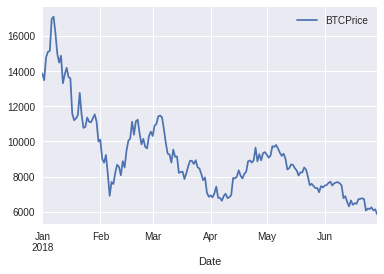

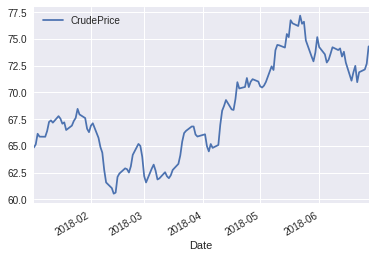

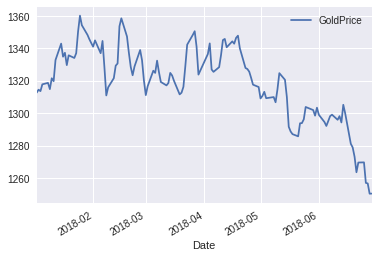

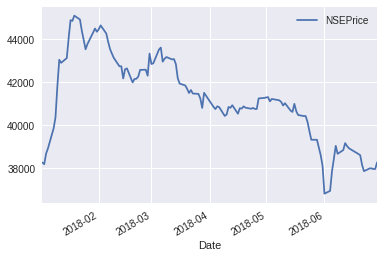

In [13]:
# Plot Graph Data
btc_data.plot()
crude_data.plot()
gold_data.plot()
nse_data.plot()
plt.show()

In [14]:
# Fill in missing dates for dataset with either the previous or next value in the series
idx = pd.date_range('2018-01-01', '2018-06-30')

btc_data = btc_data.reindex(idx)
crude_data = crude_data.reindex(idx)
gold_data = gold_data.reindex(idx)
nse_data = nse_data.reindex(idx)

In [15]:
print("---BTC---"); btc_data.info()
print("\n---CRUDE---"); crude_data.info() 
print("\n---GOLD---"); gold_data.info()
print("\n---NSE---");nse_data.info()

---BTC---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2018-01-01 to 2018-06-30
Freq: D
Data columns (total 1 columns):
BTCPrice    180 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB

---CRUDE---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2018-01-01 to 2018-06-30
Freq: D
Data columns (total 1 columns):
CrudePrice    126 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB

---GOLD---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2018-01-01 to 2018-06-30
Freq: D
Data columns (total 1 columns):
GoldPrice    125 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB

---NSE---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2018-01-01 to 2018-06-30
Freq: D
Data columns (total 1 columns):
NSEPrice    123 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB


In [16]:
btc_data.to_csv('btc.csv')
crude_data.to_csv('crude.csv')
gold_data.to_csv('gold.csv')
nse_data.to_csv('nse.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14382ac828>]], dtype=object)

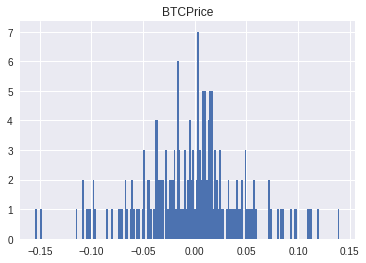

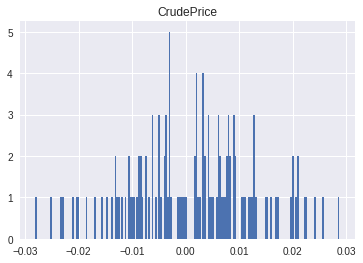

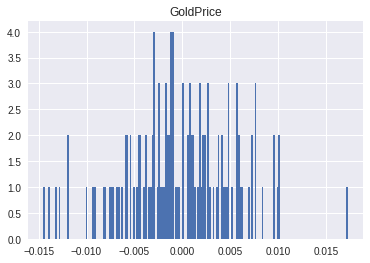

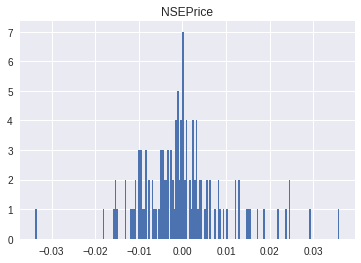

In [17]:
btc_data.pct_change().hist(bins=180)
crude_data.pct_change().hist(bins=180)
gold_data.pct_change().hist(bins=180)
nse_data.pct_change().hist(bins=180)

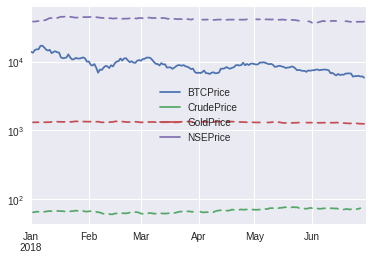

In [18]:
df = btc_data.join(crude_data).join(gold_data).join(nse_data)
df.plot(logy=True)

In [19]:
corr_matrix = df.pct_change().corr()

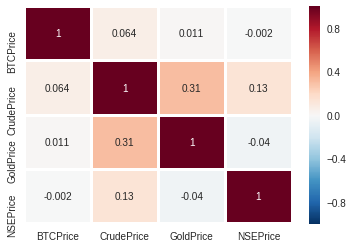

In [20]:
sns.heatmap(corr_matrix,linewidths=2.0, annot=True)